In [13]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score

# Linear Regression and Feature Selection

In [2]:
ad = pd.read_csv(r"../Datasets/Advertising.csv", index_col= 0)

In [3]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [90]:
## Visualizing the Relation b/w dataset

In [107]:
import seaborn as sns
%matplotlib inline

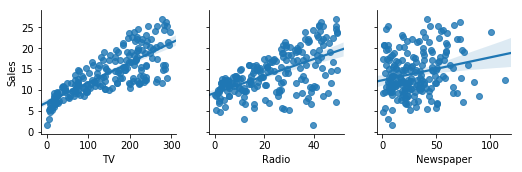

In [113]:
sns.pairplot(ad,x_vars= ["TV", "Radio", "Newspaper"], y_vars= ["Sales"], kind = "reg")

This shows that there is strong linear relationship b/w Sales, TV and Sales,Radio. However, Newspaper appear not to be that linearly related to the Sales.

# Linear Regression Taking all 3 variables

In [22]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
feature_cols = ['TV', 'Radio', 'Newspaper']

In [31]:
X = ad[['TV', 'Radio', 'Newspaper']]
y = ad["Sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_predict = linreg.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_predict)
MSE = metrics.mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
print(list(zip(feature_cols,linreg.coef_)))
print(linreg.intercept_)
print(MAE)
print(RMSE)

[('TV', 0.044757531697251225), ('Radio', 0.18434892853959223), ('Newspaper', 0.0027951335242011981)]
3.07538281671
1.18590527767
1.5635772208


In [34]:
linreg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [11]:
# It looks that the Newspaper coffecient isn't that relevant to the dataset. So we check if it is Statistically also insignificant
# We can direcly use OLS from statsmodel for direct results.
ad = pd.read_csv("../Datasets/Advertising.csv")
X = ad[["TV","Radio","Newspaper"]]
y = ad["Sales"]

model = sm.OLS(endog=y,exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 30 May 2018   Prob (F-statistic):          2.43e-171
Time:                        19:18:15   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# from above OLS estimation results, we can see that t-statistic of "Newspaper" is very low. So hypothesis that "Newspaper"
# variable's coeffecient is 0, is true.

In [ ]:
#Hypothesis testing here:
# H0 : b4=0 (Newspaper coffecient)
# Ha : b4 >0 

# statistic = (actual value of estimator - hypothised value of estimator)/s.e of estimator
# Since here n= 200, we use t test. 

# t = (0.0027-0)/s.d. of b4



So from above we can see that the cofffecient of Newspaper is very low. Thsi means that Newspaper is not that important for Sales, hence we can check results by dropping "newspaper"

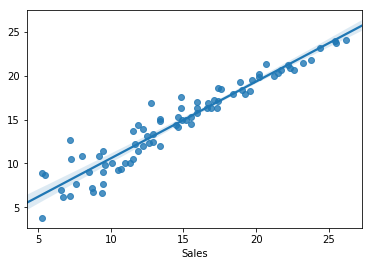

In [133]:
sns.regplot(y_test,y_predict)

Above shows that y_test & y_predict are corresponding to a linear line

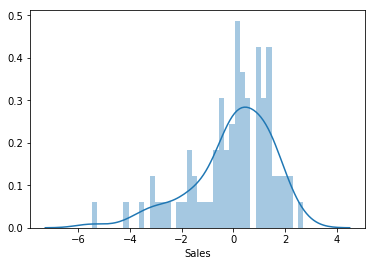

In [136]:
residual = y_test - y_predict
sns.distplot(a = residual, bins = 40)

Above is distribution of residuals which is showing that the residuals aren't normally distributed. Normally distributed residual is a good indicator of the results

### Is there any way that we can improve our Results Using feature Selection?

In [137]:
X = ad[["TV", "Radio"]]
y = ad["Sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)
print(X_train.shape)
print(X_test.shape)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_predict = linreg.predict(X_test)
MAE = metrics.mean_absolute_error(y_test,y_predict)
MSE = metrics.mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
print(list(zip(feature_cols,linreg.coef_)))
print(MAE)
print(RMSE)

(120, 2)
(80, 2)
[('TV', 0.044787477661001475), ('Radio', 0.18572065924082906)]
1.18103326764
1.55767960548


So we can see that out RMSE has actually fallen when we created model by dropping "Newspaper" variable

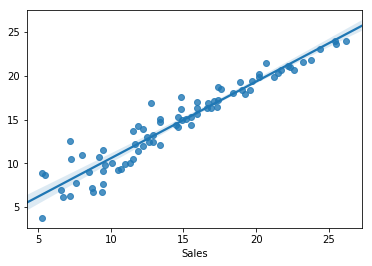

In [138]:
sns.regplot(y_test, y_predict)

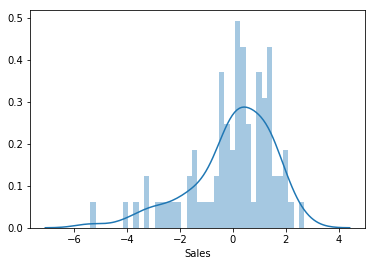

In [140]:
residual = y_test - y_predict
sns.distplot(a = residual, bins = 40)

# now our error term has become less skewed to right and corresponds to more of normal distribution

Note that with different random_state , the data will split differently,which makes the results highly variable. Hence, we need a method which splits the data in a particular way. for that, we use cross_validation

### Using cross_val_score instead of train_test_split on the ad dataset for prediction using Linear Regression

In [144]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [162]:
X = ad[["TV", "Newspaper", "Radio"]]
y = ad["Sales"]
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, scoring = "mean_squared_error", cv = 10)
scores

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-pac

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [163]:
MSE = -scores
RMSE = np.sqrt(MSE)
print(RMSE)
print(RMSE.mean())

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]
1.69135317081


In [153]:
# Here, since we take scoring = "mean squared error" in scores. MSE is a loss function, which more minimum is better.

### Is there any way to Improve the results?

#### Feature Selection and cross_val_score

In [164]:
X = ad[["TV", "Radio"]]
y = ad["Sales"]
linreg = LinearRegression()
score = cross_val_score(linreg, X, y, scoring= "mean_squared_error", cv = 10)
score

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Home\Anaconda3\lib\site-pac

array([-3.38264572, -3.28736055, -2.09185507, -2.81784389, -1.27311083,
       -1.74391853, -8.0006111 , -2.07650936, -3.03635301, -2.4289835 ])

In [165]:
MSE = -score
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

[ 3.38264572  3.28736055  2.09185507  2.81784389  1.27311083  1.74391853
  8.0006111   2.07650936  3.03635301  2.4289835 ]
[ 1.83919703  1.81310798  1.44632468  1.67864347  1.12832213  1.32057507
  2.82853515  1.44100984  1.74251342  1.55851965]


In [166]:
RMSE.mean()

1.6796748419090766

In [167]:
# So we can see that earlier RMSE.mean() = 1.6913 but now the RMSE has decreased. which actually means that our model performance
# has increased as we have decreased our error